In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

pd.options.display.max_columns = 999

In [2]:
df=pd.read_csv('data/AmesHousing.tsv',delimiter='\t')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
def transform_features(df):
#     df_copy=df.copy()
#     features=df_copy.columns.drop(['Mo Sold','Yr Sold','Sale Type','Sale Condition'])
    
    return df.copy()

def select_features(df):
    features=['Gr Liv Area', 'SalePrice']
    return df[features]

def train_and_test(df):
    train=df[:1460]
    test=df[1460:]
    # python bug was fixed or is being fixed type int wont work only int64 or integer behave as expected
    numeric_data=(select_features(df)
                  .select_dtypes(include=['integer', 'float'])
                  .drop(columns=['SalePrice'])
                 )
    
    numeric_features=numeric_data.columns
    target='SalePrice'
    
    lr=LinearRegression()
    lr.fit(train[numeric_features],train[target])
    predictions=lr.predict(test[numeric_features])
    mse= mean_squared_error(predictions,test[target])
    rmse=np.sqrt(mse)
    return rmse
    

transform_df=transform_features(df)
filtered_df=select_features(transform_df)
rmse=train_and_test(filtered_df)

rmse
    

57088.25161263909

# Feature Engineering

Handle missing values:
- All columns:
    - Drop any with 5% or more missing values for now.
- Text columns:
    - Drop any with 1 or more missing values for now.
- Numerical columns:
    - For columns with missing values, fill in with the most common value in that column

All columns:
- Drop any with 5% or more missing values for now:

In [5]:
## Series object: column name -> number of missing values
num_missing=(df
             .isnull()
             .sum()
            )

# Filter Series for columns containing >5% missing values
dop_missing_cols=num_missing[num_missing>len(df)*0.05]
df=df.drop(columns=dop_missing_cols.index)

Text columns:
- Drop any with 1 or more missing values for now.


In [6]:
## Series object: column name -> number of missing values
text_mv_count=(df
               .select_dtypes(include=['object'])
               .isnull()
               .sum()
              )


## filter Series columns containing *any* missing values
drop_missingtext_cols=text_mv_count[text_mv_count>0]
df=df.drop(columns=drop_missingtext_cols.index)

Numerical columns:
- For columns with missing values, fill in with the most common value in that column

In [7]:
numeric_missing=(df
                 .select_dtypes(include=['int','float'])
                 .isnull()
                 .sum()
                )

fixable_numeric_cols= numeric_missing[(numeric_missing<=len(df)*0.05) & (numeric_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [8]:
replacement_values_series= df[fixable_numeric_cols.index].mode().iloc[0]
replacement_values_series

BsmtFin SF 1      0.0
BsmtFin SF 2      0.0
Bsmt Unf SF       0.0
Total Bsmt SF     0.0
Garage Cars       2.0
Garage Area       0.0
Bsmt Full Bath    0.0
Bsmt Half Bath    0.0
Mas Vnr Area      0.0
Name: 0, dtype: float64

In [9]:
## Use `pd.DataFrame.fillna()` to replace missing values.
df = df.fillna(replacement_values_series)

In [10]:
## Verify that every column has 0 missing values
(df
 .isnull()
 .sum()
 .value_counts()
)

0    64
dtype: int64

What new features can we create, that better capture the information in some of the features?

In [11]:
#year built cant be after year sold, we identify records having this error and add them to drop_index set to be removed from our data frame
years_sold=df['Yr Sold']-df['Year Built']
drop_index=set()

drop_index.update(years_sold[years_sold<0].index)
drop_index

{2180}

In [12]:
#year remodeled cant be after year sold, we identify records having this error and add them to the drop_index set 
years_since_remod=df['Yr Sold']-df['Year Remod/Add']
years_since_remod[years_since_remod<0]
drop_index.update(years_since_remod[years_since_remod<0].index)
drop_index

{1702, 2180, 2181}

In [13]:
## Create new columns
df['Age'] = years_sold
df['Years Since Remod'] = years_since_remod
## Drop rows that were identified as errors
df=df.drop(index=drop_index)


In [14]:
## No longer need original year columns
df = df.drop(columns=["Year Built", "Year Remod/Add"])

Drop columns that:

- that aren't useful for ML
- leak data about the final sale, read more about columns here

In [15]:
## Drop columns that aren't useful for ML
df = df.drop(columns=["PID", "Order"])

In [16]:
## Drop columns that leak info about the final sale
df = df.drop(columns=["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"])

Let's update transform_features()

In [17]:
def transform_features(df):
    df_copy=df.copy()
    ## Series object: column name -> number of missing values
    num_missing=df_copy.isnull().sum()

    # Filter Series to columns containing >5% missing values
    perc_missing=0.05
    drop_missing_cols=num_missing[num_missing>len(df_copy)*perc_missing]
    #print(len(df_copy.columns))
    df_copy=df_copy.drop(columns=drop_missing_cols.index)
    #print(len(df_copy.columns))
    ## Series object: column name -> number of missing values
    text_mv_count=(df_copy
                   .select_dtypes(include=['object'])
                   .isnull()
                   .sum()
                  )

    ## Filter Series to columns containing *any* missing values
    drop_missingtext_cols=text_mv_count[text_mv_count>0]
    #print(len(df_copy.columns))
    df_copy=df_copy.drop(columns=drop_missingtext_cols.index)
    #print(len(df_copy.columns))
    
    numeric_missing=(df_copy
                     .select_dtypes(include=['integer','float'])
                     .isnull()
                     .sum()
                    )
    #Numerical columns: For columns with missing values, fill in with the most common value in that column these 
    #coulumns should have less than 5%
    fixable_numeric_cols= numeric_missing[(numeric_missing<=len(df_copy)*perc_missing) & (numeric_missing > 0)]
    #create a seriers of the mode values for each columns-> the result will be a DF to get the serieas we need to acces index 0
    replacement_values_series=(df_copy[fixable_numeric_cols.index]
                               .mode()
                               .iloc[0]
                              )
    
    ## Use `pd.DataFrame.fillna()` to replace missing values.
    df_copy = df_copy.fillna(replacement_values_series)
    

    
    # create two new fetures and drop the indexes where they are negative
    years_sold=df_copy['Yr Sold']-df_copy['Year Built']
    drop_index=set()
    #upate the set with index where years_sold is negative 
    drop_index.update(years_sold[years_sold<0].index)
    years_since_remod=df_copy['Yr Sold']-df_copy['Year Remod/Add']
    #update with index where year_since_remod is negative
    drop_index.update(years_since_remod[years_since_remod<0].index)
    ## Create new columns
    df_copy['Years Before Sale'] = years_sold
    df_copy['Years Since Remod'] = years_since_remod
    ## Drop rows with negative val
    df_copy=df_copy.drop(index=drop_index)
    ## No longer need original year columns
    df_copy = df_copy.drop(columns=["Year Built", "Year Remod/Add"])
    
    ## Drop columns that leak info about the final sale  & Drop columns that aren't useful for ML(last two below) 
    df_copy=df_copy.drop(columns=['Mo Sold','Yr Sold','Sale Type','Sale Condition',"PID", "Order"])
    return df_copy

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    return rmse

df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.367312413066

Feature Selection

In [18]:
import seaborn as sns

numerical_df = transform_df.select_dtypes(include=['integer', 'float'])
numerical_df.head(5)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,189900,13,12


In [19]:
abs_corr_coeffs=(numerical_df
                 .corr()
                 .loc['SalePrice']
                 .abs()
                 .sort_values(ascending=False)
                )
abs_corr_coeffs

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Wood Deck SF         0.328183
Open Porch SF        0.316262
Half Bath            0.284871
Bsmt Full Bath       0.276258
2nd Flr SF           0.269601
Lot Area             0.267520
Bsmt Unf SF          0.182751
Bedroom AbvGr        0.143916
Enclosed Porch       0.128685
Kitchen AbvGr        0.119760
Screen Porch         0.112280
Overall Cond         0.101540
MS SubClass          0.085128
Pool Area            0.068438
Low Qual Fin SF      0.037629
Bsmt Half Bath       0.035875
3Ssn Porch           0.032268
Misc Val             0.019273
BsmtFin SF 2         0.006127
Name: Sale

In [20]:
## Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
strong_corrs=abs_corr_coeffs[abs_corr_coeffs > 0.4]
abs_corr_coeffs[abs_corr_coeffs > 0.4]

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Name: SalePrice, dtype: float64

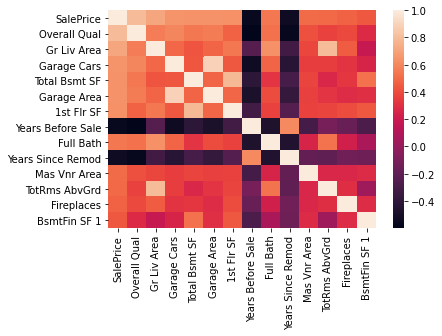

In [21]:
corrmat=numerical_df[strong_corrs.index].corr()

sns.heatmap(corrmat)
plt.show()

In [22]:
## Drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(columns=abs_corr_coeffs[abs_corr_coeffs < 0.4].index)

Which categorical columns should we keep?

In [23]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [24]:
transform_cat_col=[]
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_col.append(col)
        
## How many unique values in each categorical column?
uniqueness_counts =(transform_df[transform_cat_col]
                    .apply(lambda x: len(x.value_counts()))
                   )
uniqueness_counts


MS Zoning        7
Street           2
Land Contour     4
Lot Config       5
Neighborhood    28
Condition 1      9
Condition 2      8
Bldg Type        5
House Style      8
Roof Style       6
Roof Matl        8
Exterior 1st    16
Exterior 2nd    17
Foundation       6
Heating          6
Central Air      2
dtype: int64

In [25]:
## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [26]:
text_cols=transform_df.select_dtypes(include='object')
for col in text_cols:
    transform_df[col]=transform_df[col].astype('category')


In [27]:
pd.options.display.max_rows = 999
transform_df.dtypes


MS Zoning            category
Street               category
Lot Shape            category
Land Contour         category
Utilities            category
Lot Config           category
Land Slope           category
Condition 1          category
Condition 2          category
Bldg Type            category
House Style          category
Overall Qual            int64
Roof Style           category
Roof Matl            category
Mas Vnr Area          float64
Exter Qual           category
Exter Cond           category
Foundation           category
BsmtFin SF 1          float64
Total Bsmt SF         float64
Heating              category
Heating QC           category
Central Air          category
1st Flr SF              int64
Gr Liv Area             int64
Full Bath               int64
Kitchen Qual         category
TotRms AbvGrd           int64
Functional           category
Fireplaces              int64
Garage Cars           float64
Garage Area           float64
Paved Drive          category
SalePrice 

In [28]:
transform_df['Street'].cat.codes

0       1
1       1
2       1
3       1
4       1
       ..
2925    1
2926    1
2927    1
2928    1
2929    1
Length: 2927, dtype: int8

In [29]:
## Create dummy columns and add back to the dataframe!
transform_df = (pd.concat([transform_df, pd.get_dummies(transform_df.select_dtypes(include=['category']))], axis=1)
                .drop(text_cols,axis=1) # dropping the columns where we created dummies for
               )

In [30]:
transform_df.head()

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice,Years Before Sale,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,6,112.0,639.0,1080.0,1656,1656,1,7,2,2.0,528.0,215000,50,50,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,5,0.0,468.0,882.0,896,896,1,5,0,1.0,730.0,105000,49,49,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,6,108.0,923.0,1329.0,1329,1329,1,6,0,1.0,312.0,172000,52,52,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7,0.0,1065.0,2110.0,2110,2110,2,8,2,2.0,522.0,244000,42,42,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,5,0.0,791.0,928.0,928,1629,2,6,1,2.0,482.0,189900,13,12,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [31]:
transform_df.dtypes


Overall Qual            int64
Mas Vnr Area          float64
BsmtFin SF 1          float64
Total Bsmt SF         float64
1st Flr SF              int64
Gr Liv Area             int64
Full Bath               int64
TotRms AbvGrd           int64
Fireplaces              int64
Garage Cars           float64
Garage Area           float64
SalePrice               int64
Years Before Sale       int64
Years Since Remod       int64
MS Zoning_A (agr)       uint8
MS Zoning_C (all)       uint8
MS Zoning_FV            uint8
MS Zoning_I (all)       uint8
MS Zoning_RH            uint8
MS Zoning_RL            uint8
MS Zoning_RM            uint8
Street_Grvl             uint8
Street_Pave             uint8
Lot Shape_IR1           uint8
Lot Shape_IR2           uint8
Lot Shape_IR3           uint8
Lot Shape_Reg           uint8
Land Contour_Bnk        uint8
Land Contour_HLS        uint8
Land Contour_Low        uint8
Land Contour_Lvl        uint8
Utilities_AllPub        uint8
Utilities_NoSeWa        uint8
Utilities_

Update select_features()

In [32]:
def transform_features(df):
    df_copy=df.copy()
    ## Series object: column name -> number of missing values
    num_missing=df_copy.isnull().sum()

    # Filter Series to columns containing >5% missing values
    perc_missing=0.05
    drop_missing_cols=num_missing[num_missing>len(df_copy)*perc_missing]
    #print(len(df_copy.columns))
    df_copy=df_copy.drop(columns=drop_missing_cols.index)
    #print(len(df_copy.columns))
    ## Series object: column name -> number of missing values
    text_mv_count=(df_copy
                   .select_dtypes(include=['object'])
                   .isnull()
                   .sum()
                  )

    ## Filter Series to columns containing *any* missing values
    drop_missingtext_cols=text_mv_count[text_mv_count>0]
    #print(len(df_copy.columns))
    df_copy=df_copy.drop(columns=drop_missingtext_cols.index)
    #print(len(df_copy.columns))
    
    numeric_missing=(df_copy
                     .select_dtypes(include=['integer','float'])
                     .isnull()
                     .sum()
                    )
    #Numerical columns: For columns with missing values, fill in with the most common value in that column these 
    #coulumns should have less than 5%
    fixable_numeric_cols= numeric_missing[(numeric_missing<=len(df_copy)*perc_missing) & (numeric_missing > 0)]
    #create a seriers of the mode values for each columns-> the result will be a DF to get the serieas we need to acces index 0
    replacement_values_series=(df_copy[fixable_numeric_cols.index]
                               .mode()
                               .iloc[0]
                              )
    
    ## Use `pd.DataFrame.fillna()` to replace missing values.
    df_copy = df_copy.fillna(replacement_values_series)
    

    
    # create two new fetures and drop the indexes where they are negative
    years_sold=df_copy['Yr Sold']-df_copy['Year Built']
    drop_index=set()
    #upate the set with index where years_sold is negative 
    drop_index.update(years_sold[years_sold<0].index)
    years_since_remod=df_copy['Yr Sold']-df_copy['Year Remod/Add']
    #update with index where year_since_remod is negative
    drop_index.update(years_since_remod[years_since_remod<0].index)
    ## Create new columns
    df_copy['Years Before Sale'] = years_sold
    df_copy['Years Since Remod'] = years_since_remod
    ## Drop rows with negative val
    df_copy=df_copy.drop(index=drop_index)
    ## No longer need original year columns
    df_copy = df_copy.drop(columns=["Year Built", "Year Remod/Add"])
    
    ## Drop columns that leak info about the final sale  & Drop columns that aren't useful for ML(last two below) 
    df_copy=df_copy.drop(columns=['Mo Sold','Yr Sold','Sale Type','Sale Condition',"PID", "Order"])
    return df_copy

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['integer', 'float'])
    abs_corr_coeffs=(numerical_df
                 .corr()
                 .loc['SalePrice']
                 .abs()
                 .sort_values(ascending=False)
                )
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = (df[transform_cat_cols]
                         .apply(lambda col: len(col.value_counts()))
                        )
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
        
    df = (pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
          .drop(text_cols,axis=1)  # dropping the columns where we created dummies for
         )
    
    return df

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = LinearRegression()
    
    # When k equals 0, perform holdout validation
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    # When k equals 1, perform simple cross validation:
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1,random_state=1 )
        train = df[:1460]
        test = df[1460:]
        
        #Train on fold_one and test on fold_two.
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        #Train on fold_two and test on fold_one
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        # Compute the average RMSE and return
        avg_rmse = np.mean([rmse_one, rmse_two])
        #print(rmse_one)
        #print(rmse_two)
        return avg_rmse
    
    # When k is greater than 0, implement k-fold cross validation using k folds 
    else:
        kf = KFold(n_splits=k, shuffle=True,random_state=1)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [33]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=1)

rmse

30261.21283411452

In [34]:
rmse = train_and_test(filtered_df, k=4)

rmse

[36756.52485283856, 25652.06366579732, 25571.383146069256, 28465.768226776865]


29111.434972870502

# 